In [1]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'Referer':'https://search.shopping.naver.com/catalog/'
          ,'Sbth':'0b003b74b1ac4ff7fd4f6aeb333912dd8d0b78ec95e97e0b43eb7fdf079f6283c3d6cac389fcbc07608dc240e3a5ea90'
          ,'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'
           }

In [3]:
product = "대단한나쵸"

# 1. 전체상품(df_total)

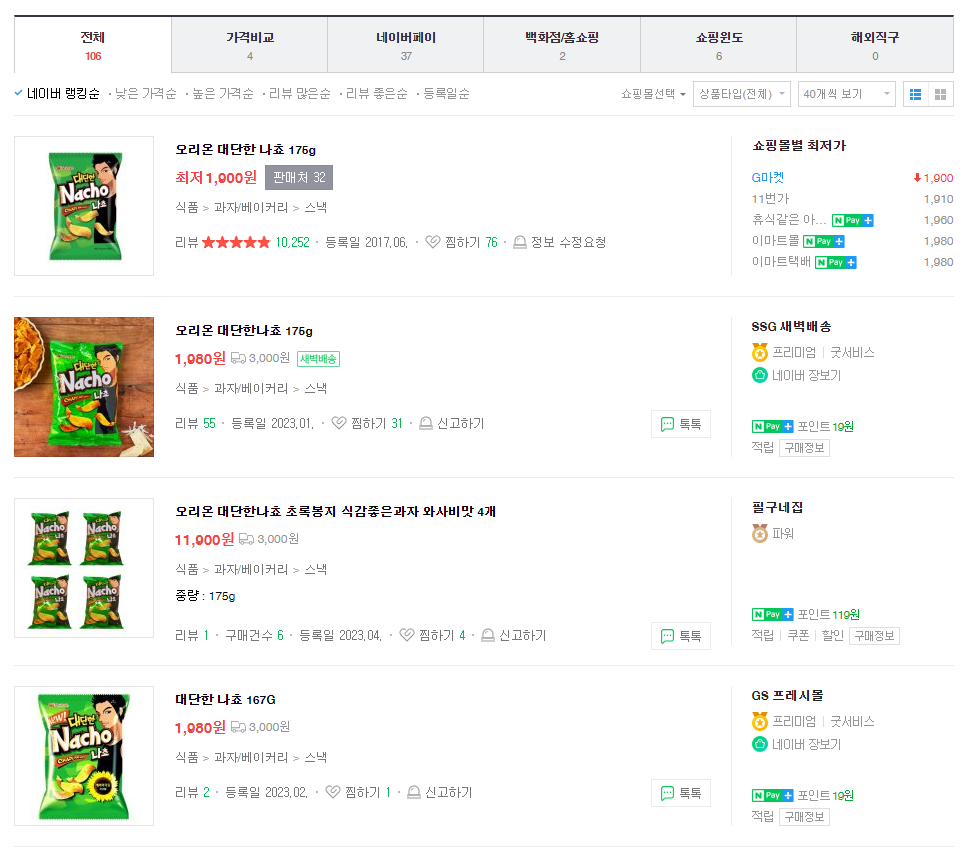

In [4]:
df_total = []
pages = 1

while True:
    # 80개씩보기(pagingIndex=80), 네이버랭킹순(sort=rel)
    # 해외직구제외(exagency), 중고제외(exused), 렌탈제외(exrental)
    url = f"https://search.shopping.naver.com/api/search/all?eq=&exagency=true&exrental=true&exused=true&iq=&origQuery={product}&pagingIndex={pages}&pagingSize=80&productSet=total&query={product}&sort=rel&sps=Y&viewType=list&xq="
    response = requests.get(url,headers=headers)
    temp = response.json()['shoppingResult']

    if temp['productCount'] == 0:
        break;

    df_total = df_total + temp["products"]
    pages = pages + 1

In [5]:
df_total = pd.DataFrame(df_total)
df_total

,collection,purchaseConditionInfos,rank,id,parentId,hasLowestCardPrice,hasPromotionCont,hasAddInFee,scoreInfo,category1Id,...,imgSgnt,imgVersion,lowPriceByMallNo,shopNNo,dummy,lowMallList,crUrl,crUrlMore,mallInfoCache,channelInfoCache
0,product,"[{'seq': '20041834', 'condition': '1개', 'count...",1,11794663746,11794663746,1,0,0,4.9,50000006,...,8428479548836318624849337143,20170630143138,31537505636/17703/4284811350/1930//3000//|2963...,0,,"[{'nvMid': '31537505636', 'mallSeq': '17703', ...",https://cr.shopping.naver.com/adcr.nhn?x=ZFxgY...,https://cr.shopping.naver.com/adcr.nhn?x=4jFzn...,NaN,NaN
1,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",2,83825039100,83825039100,0,0,0,4.8,50000006,...,19615771243974454848761371400,0,,4541160,,None,https://cr.shopping.naver.com/adcr.nhn?x=fSiJQ...,https://cr.shopping.naver.com/adcr.nhn?x=9Gsfv...,"{'seq': '4541160', 'prodCnt': '37286', 'name':...",{'talkAccountId': 'w48gap'}
2,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",3,86012843805,86012843805,0,0,0,5.0,50000006,...,9559036521371142732693644049,1,,1147622,,None,https://cr.shopping.naver.com/adcr.nhn?x=xitQx...,https://cr.shopping.naver.com/adcr.nhn?x=Be3S6...,"{'seq': '1147622', 'prodCnt': '3072', 'name': ...",{'talkAccountId': 'w4t025'}
3,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",4,85681411540,85681411540,0,0,0,5.0,50000006,...,8396938403667213155684062007,0,,1649676,,None,https://cr.shopping.naver.com/adcr.nhn?x=6Kump...,https://cr.shopping.naver.com/adcr.nhn?x=2jwbA...,"{'seq': '1649676', 'prodCnt': '8731', 'name': ...",{'talkAccountId': 'w4vi3u'}
4,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",5,83443672895,83443672895,0,0,0,NaN,50000006,...,13481120063010300036743441178,0,,4531621,,None,https://cr.shopping.naver.com/adcr.nhn?x=d4XPx...,https://cr.shopping.naver.com/adcr.nhn?x=Ijb3M...,"{'seq': '4531621', 'prodCnt': '60797', 'name':...",{'talkAccountId': ''}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",99,83563580921,83563580921,0,0,0,NaN,50000006,...,3645297528378178816101591816,0,,3080959,,None,https://cr.shopping.naver.com/adcr.nhn?x=Gx%2B...,https://cr.shopping.naver.com/adcr.nhn?x=AbSYi...,"{'seq': '3080959', 'prodCnt': '1926', 'name': ...",{'talkAccountId': ''}
99,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",100,40823131907,11794663746,0,0,0,NaN,50000006,...,8399506632606740420155732766,0,,0,,None,https://cr.shopping.naver.com/adcr.nhn?x=0UAIM...,https://cr.shopping.naver.com/adcr.nhn?x=5X0YJ...,"{'seq': '613264', 'prodCnt': '99946177', 'name...",NaN
100,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",101,39899489532,39899489532,0,0,0,NaN,50000006,...,9824039337984042412816728119,0,,0,,None,https://cr.shopping.naver.com/adcr.nhn?x=zSZ1Q...,https://cr.shopping.naver.com/adcr.nhn?x=fc7Mz...,"{'seq': '613264', 'prodCnt': '99946177', 'name...",NaN
101,product,"[{'seq': '', 'condition': '', 'count': '', 'lo...",102,83535935889,83535935889,0,0,0,NaN,50000007,...,14000053768736347455740717870,0,,3058139,,None,https://cr.shopping.naver.com/adcr.nhn?x=x%2F1...,https://cr.shopping.naver.com/adcr.nhn?x=w%2Fg...,"{'seq': '3058139', 'prodCnt': '3853', 'name': ...",{'talkAccountId': ''}


# 2. 가격비교(df_model)

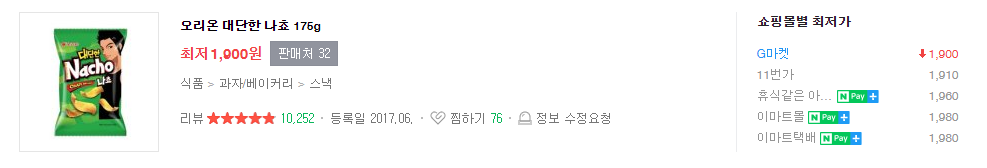

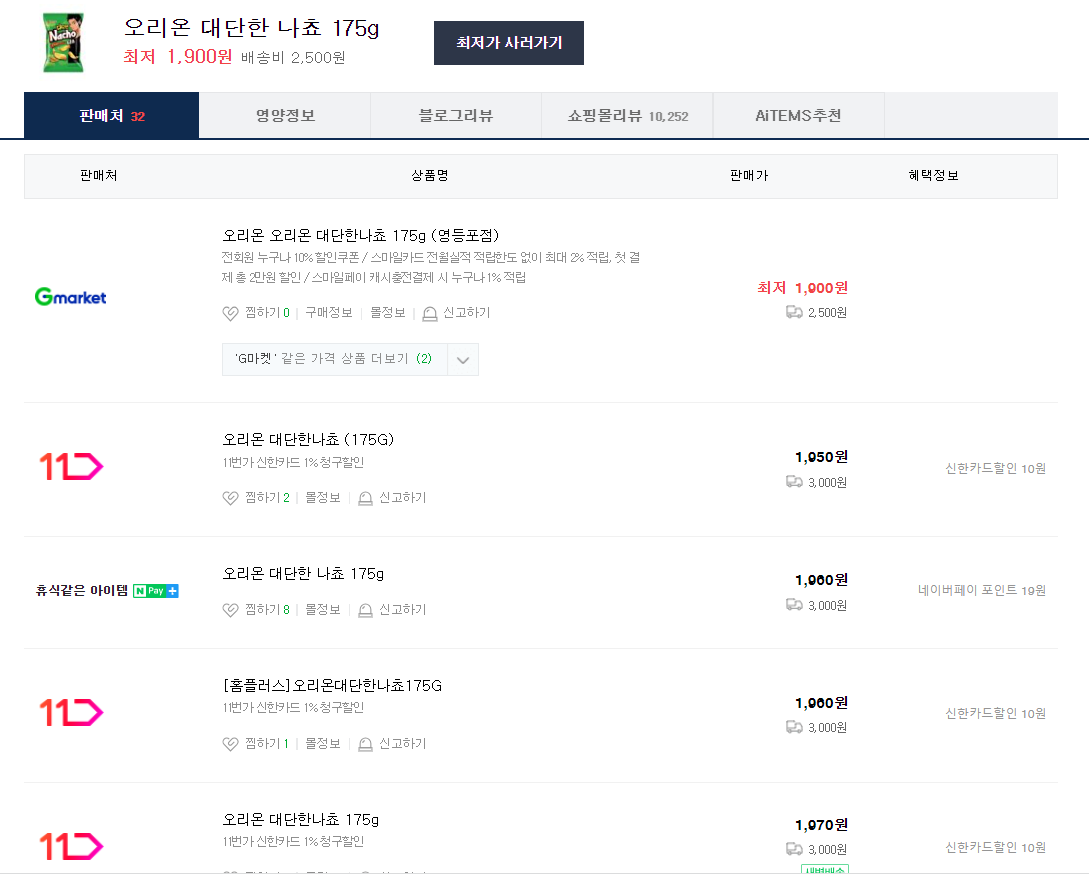

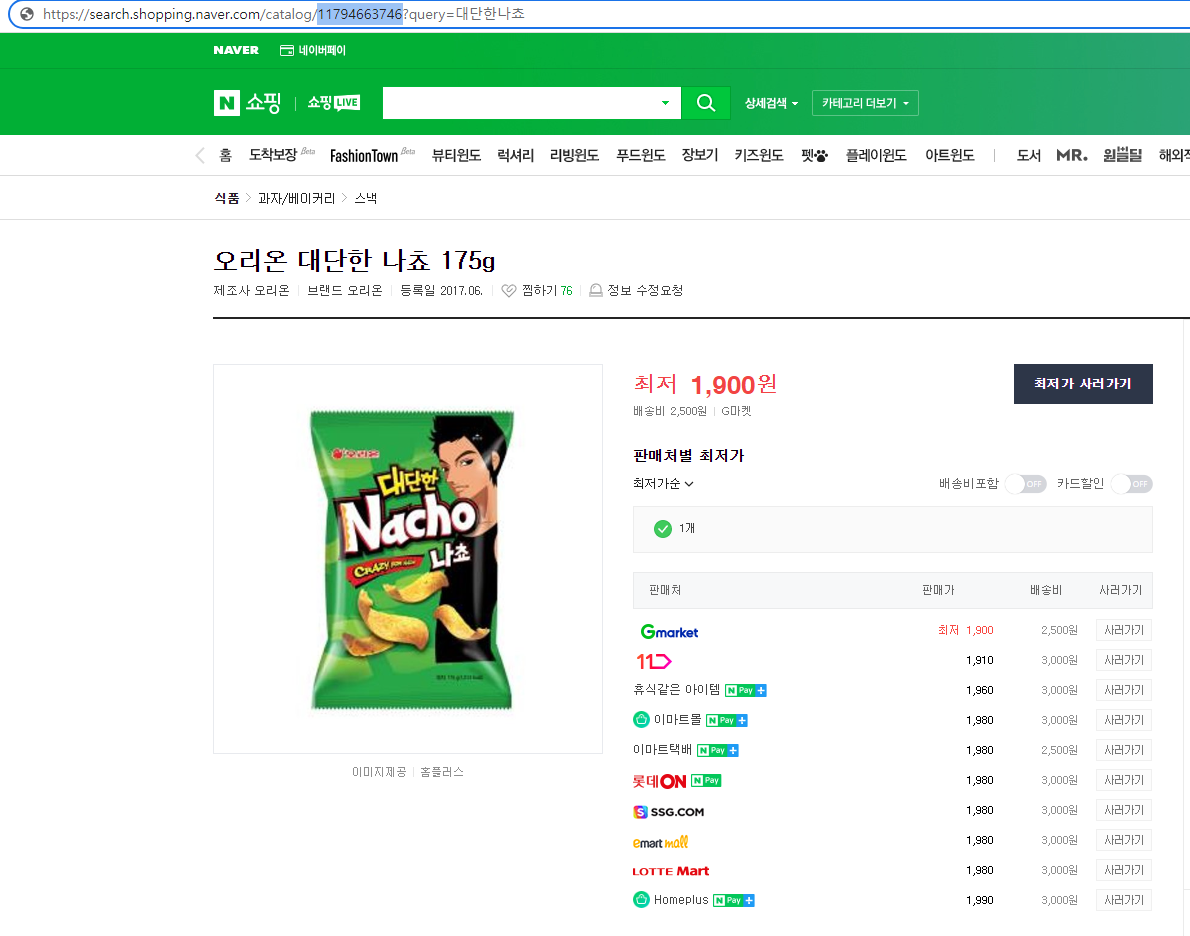

In [6]:
df_lowMallList = df_total.loc[(df_total["lowMallList"].isnull() == False)]
df_lowMallList

,collection,purchaseConditionInfos,rank,id,parentId,hasLowestCardPrice,hasPromotionCont,hasAddInFee,scoreInfo,category1Id,...,imgSgnt,imgVersion,lowPriceByMallNo,shopNNo,dummy,lowMallList,crUrl,crUrlMore,mallInfoCache,channelInfoCache
0,product,"[{'seq': '20041834', 'condition': '1개', 'count...",1,11794663746,11794663746,1,0,0,4.9,50000006,...,8428479548836318624849337143,20170630143138,41046616597/24/2278276775/1900//2500//|3153750...,0,,"[{'nvMid': '41046616597', 'mallSeq': '24', 'ma...",https://cr.shopping.naver.com/adcr.nhn?x=jKWlR...,https://cr.shopping.naver.com/adcr.nhn?x=wWZyH...,NaN,NaN


In [8]:
df_model = []

for index, row in df_lowMallList.iterrows():
    pages = 1

    while True:
        # 20개씩보기(pagingIndex=20), 가격낮은순(sort=LOW_PRICE)
        url = f"https://search.shopping.naver.com/api/catalog/{id}/products?arrivalGuarantee=false&cardPrice=false&deliveryToday=false&fastDelivery=false&isNPayPlus=false&lowestPrice&nvMid={id}&onlyBeautyWindow=false&page={pages}&pageSize=20&pr=PC&sort=LOW_PRICE&withFee=false&catalogProviderTypeCode&catalogType=DEFAULT&exposeAreaName=SELLER_BY_PRICE&inflow=slc&isManual=false&query"
        response = requests.get(url,headers=headers)
        temp = response.json()['result']

        if temp['pagingCount'] == 0:
            break;

        df_model = df_model + temp["products"]
        pages = pages + 1

In [9]:
df_model = pd.DataFrame(df_model)
df_model

,nvMid,foldingCount,matchNvMid,categoryId,mallId,mallPid,mallSequence,mallName,channelSequence,channelName,...,mallInfoLogoUrl,dbDiscount,mallGrade,mallBusinessNumber,mallRegisteredNumber,mallBusinessBaseAddress,mallUrl,updateDate,savingPoint,savingStorePoint
0,41046616597,3,11794663746,50001998,goodsdaq,2278276775,24,G마켓,None,None,...,https://shopping-phinf.pstatic.net/20210802_10...,False,PLATINUM,2208183676,강남 10630호,"서울특별시 강남구 테헤란로 152 (역삼동, 강남파이낸스센터)",http://www.gmarket.co.kr,2023.07.19.,NaN,NaN
1,31537505636,1,11794663746,50001998,11st,4284811350,17703,11번가,None,None,...,https://shopping-phinf.pstatic.net/20220906_14...,False,PLATINUM,8158101244,2018-서울중구-1445,"서울특별시 중구 한강대로 416 (남대문로5가, 서울스퀘어)",http://www.11st.co.kr,2023.07.19.,NaN,NaN
2,85907285482,1,11794663746,50001998,ncp_1nxfrv_01,8362785159,1229120,휴식같은 아이템,100713980,휴식같은 아이템,...,False,False,POWER,2874600487,2020-대구달서-0896,대구광역시 달서구 조암로6길 20 (월성푸르지오) 107동 29층 2901호 (우 ...,https://smartstore.naver.com/itemofrest,2023.07.19.,19.0,NaN
3,16577573928,1,11794663746,50001998,11st,1103289792,17703,11번가,None,None,...,https://shopping-phinf.pstatic.net/20220906_14...,False,PLATINUM,8158101244,2018-서울중구-1445,"서울특별시 중구 한강대로 416 (남대문로5가, 서울스퀘어)",http://www.11st.co.kr,2023.07.19.,NaN,NaN
4,25076272985,1,11794663746,50001998,11st,3194511569,17703,11번가,None,None,...,https://shopping-phinf.pstatic.net/20220906_14...,False,PLATINUM,8158101244,2018-서울중구-1445,"서울특별시 중구 한강대로 416 (남대문로5가, 서울스퀘어)",http://www.11st.co.kr,2023.07.19.,NaN,NaN
5,83443773602,1,11794663746,50001998,ncp_1o9omi_01,5899274114,4531621,이마트몰,101309003,이마트몰,...,False,False,PLATINUM,8708801143,2022-서울강남-03751,서울특별시 강남구 테헤란로 231 (센터필드) east동 21-24.25(일부)층 ...,https://shopping.naver.com/outlink/storehome/1...,2023.07.19.,19.0,NaN
6,85676499520,4,11794663746,50001998,ncp_1ob49l_01,8131999197,4952984,이마트택배,101378149,이마트택배,...,False,False,BPOWER,8708801143,2022-서울강남-03751,서울특별시 강남구 테헤란로 231 (센터필드) east동 21-24.25(일부)층 ...,https://smartstore.naver.com/emart_delivery,2023.07.19.,19.0,NaN
7,24350597240,1,11794663746,50001998,ssgcom,0000007539134,218835,SSG닷컴,None,None,...,https://shopping-phinf.pstatic.net/20180724_5/...,True,PLATINUM,8708801143,제 2019-서울중구-0034호,"서울특별시 강남구 테헤란로 231 (역삼동, 센터필드)",http://www.ssg.com,2023.07.19.,NaN,NaN
8,22649773657,1,11794663746,50001998,lotteon,LM8801117751708,1243359,롯데ON,None,None,...,https://shopping-phinf.pstatic.net/20201222_0/...,False,PLATINUM,5298500774,제2018-서울중구-1226호,"서울특별시 송파구 올림픽로 300 (신천동, 롯데월드타워앤드롯데월드몰)",http://www.lotteon.com,2023.07.19.,19.0,NaN
9,36949678805,1,11794663746,50001998,emart,0000007539134,596,이마트몰,None,None,...,https://shopping-phinf.pstatic.net/20180724_7/...,True,PREMIUM,8708801143,제 2019-서울중구-0034호,"서울특별시 강남구 테헤란로 231 (역삼동, 센터필드)",http://emart.ssg.com,2023.07.19.,NaN,NaN
